In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import geopandas as gpd                            #To plot hte TX outline
from shapely.geometry import Point, Polygon        #Draw the TX state outlines

In [2]:
excel_file = r"https://github.com/anuradha495/SML_Project/raw/main/FlareData.xlsx"
df = pd.read_excel(excel_file)

In [3]:
df.head()

,Month,S1,O1,S2,O2,S3,O3,S4,O4,S5,...,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10
0,2018-01,1994.199,477,1332.476,0,2563.281,5805.2,2703.448,0,2652.332,...,90581,15881,37283,0,27360,0,28412,0,173195,157871
1,2018-02,1664.045,5478,1913.658,0,2703.542,5636.1,2711.218,7514,3448.660,...,185998,21021,109725,0,67197,0,32355,0,163224,140697
2,2018-03,2352.781,4549,2793.789,0,1744.233,4937.3,2811.203,5533,2884.450,...,235896,25840,148087,0,114225,0,40901,0,172094,384938
3,2018-04,1705.877,0,1495.779,0,1864.135,4042.0,2745.745,2380,2531.614,...,186048,21994,119866,0,37052,0,37908,0,156969,217470
4,2018-05,1798.983,1222,2986.140,228,2011.461,5561.0,3573.114,17683,3148.371,...,277367,19281,99522,0,21389,0,36458,0,167769,191095


In [4]:
year_values = [2018] * 12,[2019] * 12,[2020] * 12,[2021] * 12
year_values


([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
 [2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
 [2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
 [2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021])

In [5]:
def getYear(date):
    #yyyy-mm
    year, month = date.split("-")
    return year

In [6]:
df["year"] = df["Month"].apply(lambda x: x.split("-")[0])

In [7]:
display(df)

,Month,S1,O1,S2,O2,S3,O3,S4,O4,S5,...,P2,P3,P4,P5,P6,P7,P8,P9,P10,year
0,2018-01,1994.199,477,1332.4760,0,2563.281,5805.2,2703.448,0,2652.332,...,15881,37283,0,27360,0,28412,0,173195,157871,2018
1,2018-02,1664.045,5478,1913.6580,0,2703.542,5636.1,2711.218,7514,3448.660,...,21021,109725,0,67197,0,32355,0,163224,140697,2018
2,2018-03,2352.781,4549,2793.7890,0,1744.233,4937.3,2811.203,5533,2884.450,...,25840,148087,0,114225,0,40901,0,172094,384938,2018
3,2018-04,1705.877,0,1495.7790,0,1864.135,4042.0,2745.745,2380,2531.614,...,21994,119866,0,37052,0,37908,0,156969,217470,2018
4,2018-05,1798.983,1222,2986.1400,228,2011.461,5561.0,3573.114,17683,3148.371,...,19281,99522,0,21389,0,36458,0,167769,191095,2018
5,2018-06,2345.116,8109,2848.8140,211,3945.475,7394.0,2819.299,4368,3584.901,...,18321,73134,0,55430,0,32728,0,160916,182933,2018
6,2018-07,3238.066,2671,1709.0550,189,2448.778,6336.0,2030.103,2993,2614.231,...,19365,125763,0,50238,0,32215,0,161534,157452,2018
7,2018-08,3930.280,2715,1202.7830,182,3044.648,2782.0,2631.183,1624,2386.479,...,18829,236362,0,92947,0,28984,0,162310,124080,2018
8,2018-09,3220.607,2463,1657.5300,228,2791.847,2508.0,2127.648,2354,5417.845,...,21441,294013,0,100757,0,30132,0,161334,138175,2018
9,2018-10,3383.269,4555,1255.7980,231,2676.359,2233.0,2236.539,11514,3357.635,...,21057,292370,0,46976,0,28746,0,157895,327523,2018


In [8]:
df_sum = df.groupby("year").sum() 

df_sum['yearly_satellite']=df_sum['S1']+df_sum['S2']+df_sum['S3']+df_sum['S4']+df_sum['S5']+df_sum['S6']+df_sum['S7']+df_sum['S8']+df_sum['S9']+df_sum['S10']
df_sum['yearly_operator']=df_sum['O1']+df_sum['O2']+df_sum['O3']+df_sum['O4']+df_sum['O5']+df_sum['O6']+df_sum['O7']+df_sum['O8']+df_sum['O9']+df_sum['O10']


# Print the output.
df_sum

,S1,O1,S2,O2,S3,O3,S4,O4,S5,O5,...,P3,P4,P5,P6,P7,P8,P9,P10,yearly_satellite,yearly_operator
year,,,,,,,,,,,,,,,,,,,,,
2018,32720.633,40184,23410.9580,1662,30516.573,54322.6,33722.819,72956,39470.987,68042,...,2008720,0,691426,0,382095,66990,1946383,2732417,327809.3289,2063994.6
2019,55466.286,57859,18472.5670,2046,27580.600,42526.0,34963.453,96360,38592.994,131658,...,2185786,355928,3009630,1822412,227746,371973,1538936,3147140,358331.3900,1692431.0
2020,77290.985,40943,16312.3618,1932,33179.273,56569.0,26770.229,36155,40396.950,69012,...,2633286,146347,1832631,752128,101808,153318,1620915,3816677,387164.4644,935604.0
2021,52155.741,15060,19051.7820,1699,27079.017,26970.0,22314.536,566,36005.507,12057,...,2577265,109416,964692,398305,127983,71850,1659612,3378923,301112.5613,271121.0


In [9]:
# Font for figure for publishing
font_axis_publish = {
        'color':  'black',
        'weight': 'bold',
        'size': 22,
        }
#plt.rcParams['ytick.labelsize'] = 16
#plt.rcParams['xtick.labelsize'] = 16

In [10]:
# Read in data
pred_vals = df["S1"],df["S2"],df["S3"],df["S4"],df["S5"],df["S6"],df["S7"],df["S8"],df["S9"],df["S10"]
gt_vals = df["O1"],df["O2"],df["O3"],df["O4"],df["O5"],df["O6"],df["O7"],df["O8"],df["O9"],df["O10"]

Text(0.5, 1.0, 'Parity Plot')

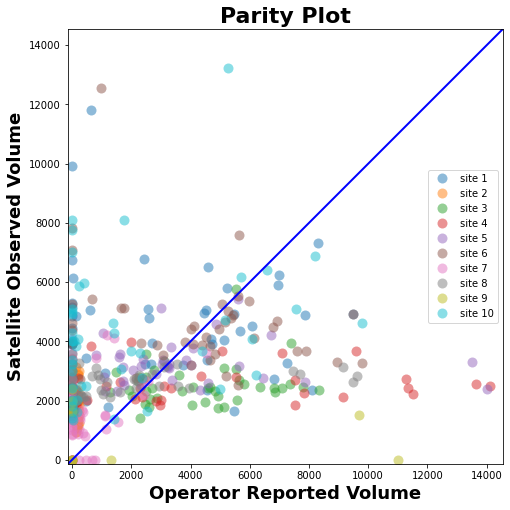

In [11]:
# Plot Figures
fignow = plt.figure(figsize=(8,8))

legend=list()
for i in range(10):
    legend+=[str("site "+str(i+1))]
    x = gt_vals[i]
    y = pred_vals[i]
    
    ## find the boundaries of X and Y values
    bounds = (min(x.min(), y.min()) - int(0.1 * y.min()), max(x.max(), y.max())+ int(0.1 * y.max()))
    
    # Reset the limits
    ax = plt.gca()
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    
    # Ensure the aspect ratio is square
    ax.set_aspect("equal", adjustable="box")
    
    
    
    plt.plot(x,y,"o", alpha=0.5 ,ms=10, markeredgewidth=0.0)
    ax.legend(legend)
ax.plot([0, 1], [0, 1], "b-",lw=2 ,transform=ax.transAxes)
ax.set_xlabel("Operator Reported Volume", fontsize = 18, fontweight ='bold')
ax.set_ylabel("Satellite Observed Volume", fontsize = 18, fontweight ='bold')
plt.title("Parity Plot", fontdict=font_axis_publish)


# Calculate Statistics of the Parity Plot 
#mean_abs_err = np.mean(np.abs(x-y))
#rmse = np.sqrt(np.mean((x-y)**2))
#rmse_std = rmse / np.std(y)
#z = np.polyfit(x,y, 1)
#y_hat = np.poly1d(z)(x)

#text = f"$\: \: Mean \: Absolute \: Error \: (MAE) = {mean_abs_err:0.3f}$ \n $ Root \: Mean \: Square \: Error \: (RMSE) = {rmse:0.3f}$ \n $ RMSE \: / \: Std(y) = {rmse_std :0.3f}$ \n $R^2 = {r2_score(y,y_hat):0.3f}$"

#plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
#     fontsize=14, verticalalignment='top')

  

Text(0.09, 0.5, 'Satellite Observed Volume, MCF/month')

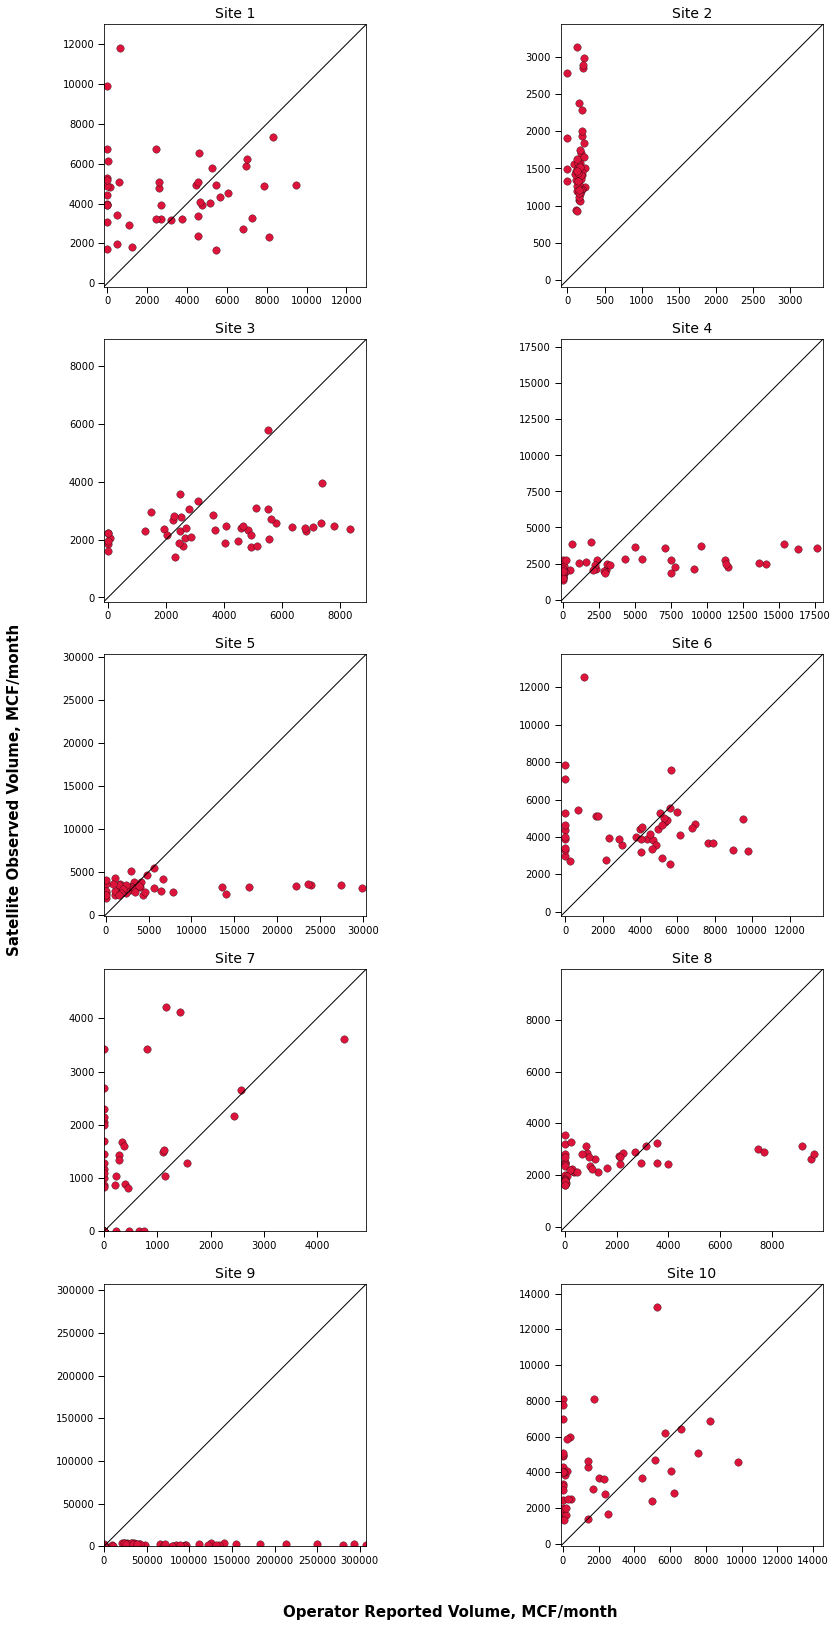

In [12]:
fig, ax = plt.subplots(5, 2)

fig.set_figheight(28)
fig.set_figwidth(15)


legend=list()
for i in range(10):
    legend+=[str("site "+str(i+1))]
    x = gt_vals[i]
    y = pred_vals[i]
    
    ## find the boundaries of X and Y values
    bounds = (min(x.min(), y.min()) - int(0.1 * y.min()), max(x.max(), y.max())+ int(0.1 * y.max()))
    
    # Reset the limits
    ax[int(i/2)][i%2].set_xlim(bounds)
    ax[int(i/2)][i%2].set_ylim(bounds)
    
    # Ensure the aspect ratio is square
    ax[int(i/2)][i%2].set_aspect("equal", adjustable="box")
    
    
    ax[int(i/2)][i%2].plot(x,y,"o",color='crimson', alpha=1 ,ms=7.5, markeredgewidth=0.3,mec="black")
    
    ax[int(i/2)][i%2].plot([0, 1], [0, 1], "k-",lw=1 ,transform=ax[int(i/2)][i%2].transAxes)
    id = i+1
    ax[int(i/2)][i%2].set_title(f'Site {id}', fontsize ='14')
    ax[int(i/2)][i%2].tick_params(labelrotation=0,length=6, width=1)
    
fig.text(0.5, 0.09, 'Operator Reported Volume, MCF/month', ha='center',fontsize='15',fontweight='bold')
fig.text(0.09, 0.5, 'Satellite Observed Volume, MCF/month', va='center', rotation='vertical',fontsize='15',fontweight='bold')    

Text(0.04, 0.5, 'Volume')

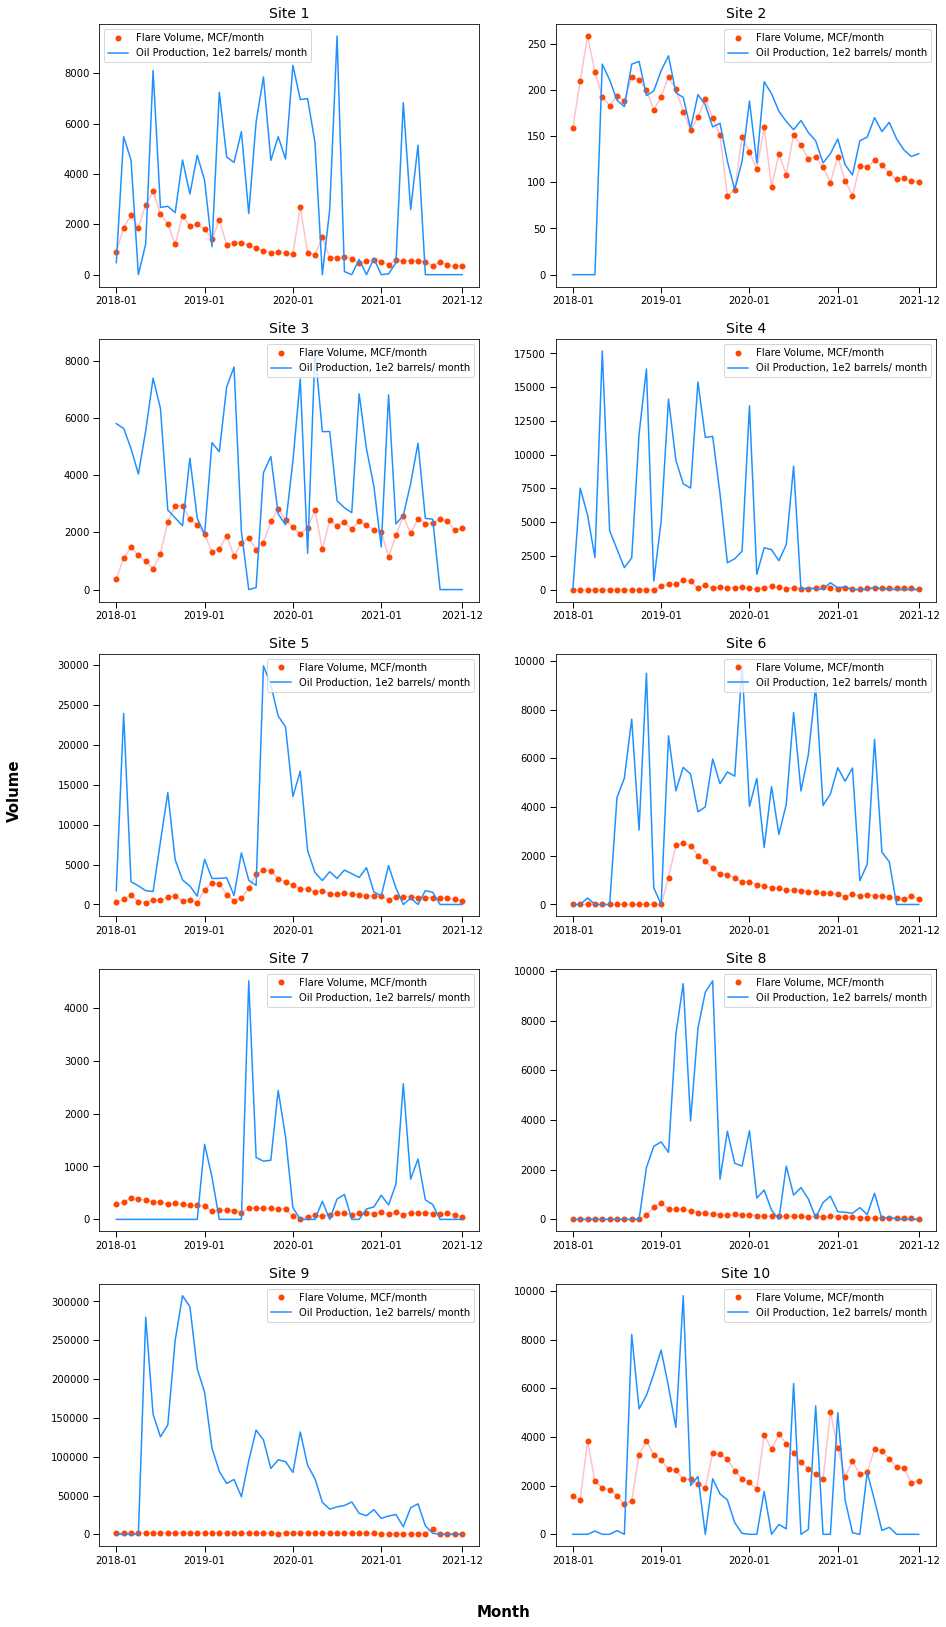

In [13]:
# Read in data
pred_vals = df["P1"],df["P2"],df["P3"],df["P4"],df["P5"],df["P6"],df["P7"],df["P8"],df["P9"],df["P10"]
gt_vals = df["O1"],df["O2"],df["O3"],df["O4"],df["O5"],df["O6"],df["O7"],df["O8"],df["O9"],df["O10"]

fig, ax = plt.subplots(5, 2)

fig.set_figheight(28)
fig.set_figwidth(15)


legend=list()
for i in range(10):
    legend+=[str("site "+str(i+1))]
    x = gt_vals[i]
    y = pred_vals[i]/100
    
    #####DONT FOORGET TO MENTION THAT YOU DIVIDED Oil PRODUCTION BY 100 & barrels units
    
    ax[int(i/2)][i%2].plot(df['Month'],y,"-",color='pink', alpha=1 ,ms=6, markeredgewidth=0.0)
    ax[int(i/2)][i%2].plot(df['Month'],y,"o",color='orangered', alpha=1 ,ms=6, markeredgewidth=0.0,label ='Flare Volume, MCF/month')
    ax[int(i/2)][i%2].plot(df['Month'],x,"-",color='dodgerblue', alpha=1 ,ms=6, markeredgewidth=0.0,label ='Oil Production, 1e2 barrels/ month')
    id = i+1
    ax[int(i/2)][i%2].set_title(f'Site {id}', fontsize ='14')
    ax[int(i/2)][i%2].tick_params(labelrotation=0,length=6, width=1)
    ax[int(i/2)][i%2].legend()
    ax[int(i/2)][i%2].set_xticks([0,12,24,36,47])
    
    
fig.text(0.5, 0.09, 'Month', ha='center',fontsize='15',fontweight='bold')
fig.text(0.04, 0.5, 'Volume', va='center', rotation='vertical',fontsize='15',fontweight='bold')


In [14]:
usa = gpd.read_file('/Users/anuradharadhakrishnan/Downloads/geopandas-tutorial/data/usa-states-census-2014.shp')
#usa.head()              # for plotting the outline of Texas map

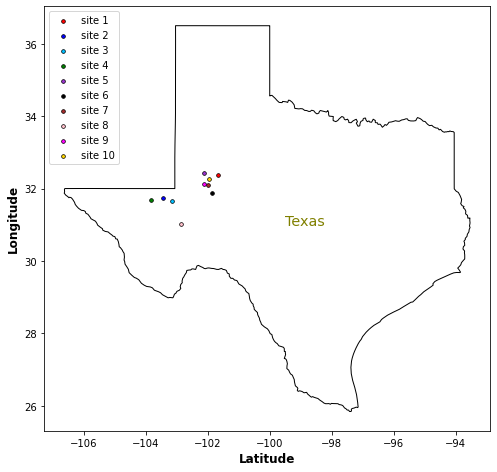

In [15]:
#below two lines are the code to plot the 3 southern states
south = usa[usa['STUSPS'].isin(['NM', 'TX', 'OK'])]
#south_plot = south.boundary.plot(figsize=(12, 12), color='grey', linewidth=1)

texas = usa[usa['NAME']=="Texas"]
texas_plot = texas.boundary.plot(figsize=(8, 8), color='black', linewidth=1)
#fig = south_plot.get_figure()

list_lat = [32.37,31.738,31.646,31.692,32.419,31.88,32.096,31.034,32.133,32.262]
list_long = [-101.658,-103.452,-103.153,-103.848,-102.125,-101.859,-101.989,-102.877,-102.130,-101.974]
legend_color=['red','blue', 'deepskyblue', 'green','darkorchid','black','brown','pink','magenta','gold']
n=['site 1','site 2','site 3','site 4','site 5','site 6','site 7','site 8','site 9','site 10']
#markersize1 = data1['MarkerSize'].to_list()
for i in range(len(n)):
    plt.scatter(x=list_long[i],y=list_lat[i], s=14, c=legend_color[i],label=n[i],edgecolor='black', linewidth=0.7)
plt.text(-99.5, 31, 'Texas', c='olive', fontsize='x-large')
plt.legend(loc='upper left')
plt.xlabel("Latitude", fontweight ='bold', fontsize = 12)
plt.ylabel("Longitude", fontweight ='bold', fontsize = 12)

#for i, txt in enumerate(n):
#    plt.annotate(txt, (list_long[i], list_lat[i]), size=8)

plt.show()

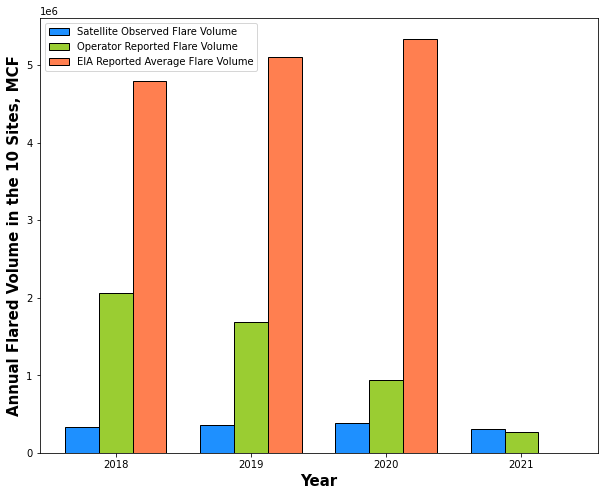

In [16]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 8))
 
# set height of bar
sat1 = [df_sum['yearly_satellite'].iloc[0], df_sum['yearly_satellite'].iloc[1],df_sum['yearly_satellite'].iloc[2],df_sum['yearly_satellite'].iloc[3]]
rep1 = [df_sum['yearly_operator'].iloc[0], df_sum['yearly_operator'].iloc[1],df_sum['yearly_operator'].iloc[2],df_sum['yearly_operator'].iloc[3]]
#EIA= [4.836626016,5.103739837,5.345162602,0]
EIA = [4800000, 5100000, 5340000, 0]
 
# Set position of bar on X axis
br1 = np.arange(len(sat1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, sat1, color ='dodgerblue', width = barWidth,
        edgecolor ='black', label ='Satellite Observed Flare Volume')
plt.bar(br2, rep1, color ='yellowgreen', width = barWidth,
        edgecolor ='black', label ='Operator Reported Flare Volume')
plt.bar(br3, EIA, color ='coral', width = barWidth,
        edgecolor ='black', label ='EIA Reported Average Flare Volume')
 
# Adding Xticks
plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Annual Flared Volume in the 10 Sites, MCF', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(sat1))],
        ['2018', '2019', '2020', '2021'])

 
plt.legend()
plt.show()

In [17]:
for k in range(4):
    a=df_sum['yearly_satellite'].iloc[k]/df_sum['yearly_operator'].iloc[k]*100
    print(a)

15.882276479793116
21.172584879383557
41.38123227348323
111.06205764215977
